##### Metody obliczeniowe w nauce i technice

## Laboratorium 12 - Równania różniczkowe i zagadnienie początkowe

### Sprawozdanie sporządził: Marcin Zielonka

### Wstęp

Do realizacji zadań skorzystam z gotowych funkcjonalności zawartych w bibliotekach:
- `numpy` - wersja `1.18.2`
- `matplotlib` - wersja `3.2.0`
- `scipy` - wersja `1.4.1`
- `math`
- `random`

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import math

Dodatkowo, zaimplementowałem na potrzeby zadań w zestawie funkcję realizującą działanie funkcji trygonometrycznej $sec(x)$:

In [2]:
def sec(x):
    return 1 / math.cos(x)

### Zadanie 1: Metoda Rungego-Kutty

Zaimplementuj metodę Rungego-Kutty czwartego rzędu (rozdział 10.2, Kincaid i Cheney), a następnie:
1. Opisz zalety metody Rungego-Kutty w porównaniu do metody z szeregami Taylora
2. Rozwiąż zagadnienie początkowe dane równaniem $x'=x/t+t\sec(x/t)$ z warunkiem początkowym $x(0)=0$. Przedłuż rozwiązanie do $t=1$ z krokiem $h=2^{−7}$. Porównaj wynik z dokładnym rozwiązaniem: $x(t)=t\arcsin(t)$.
3. Używając tej samej metody rozwiąż zagadnienie początkowe dane równaniem $x'=100(\sin(t)−x)$ z warunkiem początkowym $x(0)=0$ na przedziale $[0,3]$ używając kroków o rozmiarach $h=0.015,0.02,0.025,0.03$. Opisz z czego wynikają różnice w rozwiązaniach.

Zalety metody Rungego-Kutty w porównaniu do metody z szeregami Taylora:

Główną zaletą metody Rungego-Kutty w porównaniu do metody z szeregami Taylora jest fakt, iż nie potrzebuje znać wyrażeń pochodnych dla funkcji $f$. Dodatkowo, przy zastosowaniu metody z szeregami Taylora, musimy wiedzieć, że pewne pochodne cząstkowe funkcji $f$ istnieją (w metodzie Rungego-Kutty nie jest to potrzebne).

Aby rozwiązać zagadnienie początkowo dane równaniem $x'=x/t+tsec(x/t)$, zaimplementowałem w oparciu o informacje znajdujące się w książce *Analiza numeryczna* D. Kincaida i W. Cheney'a, funkcję `runge_kutta_solve`, która przyjmuje następujące parametry:
- `f` - funkcja $f(t,x)$
- `x0` - argument warunku początkowego
- `t0` - wartość warunku początkowego
- `tk` - wartość, do której ma zostać przedłużone rozwiązanie
- `h` - wartość kroku

Funkcja ta zwraca listę krotek, z których każda z nich zawiera informację o $i$-tym kroku, wartości argumenty i wartości dla tego argumentu

In [3]:
def runge_kutta_solve(f, x0, t0, tk, h):
    k_max = math.ceil((tk - t0) / h)
    
    result = []
    
    t = t0 + 1e-100
    x = x0 + 1e-100
    
    for k in range(k_max):
        F1 = h * f(t, x)
        F2 = h * f(t + 0.5 * h, x + 0.5 * F1)
        F3 = h * f(t + 0.5 * h, x + 0.5 * F2)
        F4 = h * f(t + h, x + F3)
        
        x = x + (F1 + 2 * F2 + 2 * F3 + F4) / 6
        t = t + h
        
        result.append((k, t, x))
        
    return result

Następnie napisałem pomocniczą funkcję, która porównuje otrzymane wyniki z dokładnym rozwiązaniem (a dokładniej wartość błędu bezwględnego pomiędzy wynikami).

In [4]:
def compare_results_with_function(RKS, u):
    xs = []
    ys = []
    
    for k, t, x in RKS:        
        xs.append(t)
        ys.append(abs(u(t) - x))
    
    plt.plot(xs, ys, 'b')
    plt.show()

Następnie podałem wszystkie potrzebne parametry i wywołałem funkcję w celu otrzymania i przeanalizowania wyników:

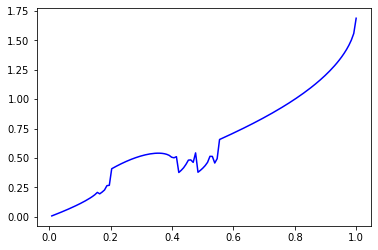

In [5]:
f = lambda t, x: x / t + t * sec(x / t)
u = lambda t: t * math.asin(t)

result = runge_kutta_solve(f, 0, 0, 1, 2 ** -7)
compare_results_with_function(result, u)

Jak widać wraz z przedłużaniem rozwiązania, błąd bezwględny rośnie w sposób jednostajny, a w okolicach wartości $1$ (do której robiliśmy przedłużenie rozwiązania), wartość tego błądu zaczyna rosnąć szybciej.

W celu sprawdzenia porównania wyników w zależności od zastosowanej wielkości wartości kroku $h$ napisałem dodatkową funkcję pomocniczą, która wyrysowuje wykres na podstawie obliczonych punktów przy użyciu wcześniej zaimplementowanego algorytmu:

In [6]:
def compare_result_by_h(results):
    colors = ['b', 'g', 'r', 'm', 'm', 'y', 'k']
    for idx, result in enumerate(results):
        xs = []
        ys = []
        
        for k, t, x in result:
                xs.append(t)
                ys.append(x)
        
        plt.plot(xs, ys, colors[idx] + 'o', markersize=1)
    
    plt.ylim(bottom=-0.5, top=10)
    plt.xlim(left=0, right=3)
    plt.show()

Nastepnie wygenerowałem wyniki dla rozwiązania zagadnienia początkowego danego równaniem $x'=100(\sin(t)-x)$ z warunkiem początkowym $x(0)=0$, aby przeanalizować otrzymany wykres funkcji w zależności od zastosowanej wielkości wartości kroku $h$:

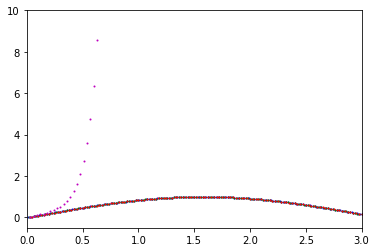

In [7]:
f = lambda t, x: 100 * (math.sin(t) - x)
results = []

for h in [0.015, 0.02, 0.025, 0.03]:
    results.append(runge_kutta_solve(f, 0, 0, 3, h))

compare_result_by_h(results)

Jak można zauważyć, wykresy funkcji otrzymane przy zastosowaniu wartości kroku $h$ równego $0.015, 0.02 i 0.025$ są praktycznie takie same. Natomiast wykres otrzymanej funkcji dla kroku $h=0.03$ znacząco różni się od pozostałych. Jest to spowodowane faktem, iż wielkość wartości $h$ wpływa na wartości wyliczanych w trakcie działania algorytmu wartości $F_i$, które następnie wpływaja na otrzymane wartości $t$ i $x$.

### Zadanie 2: Adaptacyjna metoda Rungego-Kutty-Fehlberga

Zaimplementuj adaptacyjną metodę Rungego-Kutty-Fehlberga (rozdział 10.3, Kincaid i Cheney) i użyj jej do rozwiązania zagadnienia początkowego: $x'=3x/t+9/2t−13$ z warunkiem brzegowym $x(3)=6$ w punkcie $x(1/2)$ z dokładnością do $9$ miejsc po przecinku. Porównaj wynik z rozwiązaniem analitycznym $x=t^3−9/2t^2+13/2t$. W jaki sposób metoda adaptacyjna pozwala nam zwiększyć dokładność rozwiązania? Jakie są tego wady?

Na podstawie informacji (w tym pseudokodu i tabeli z odpowiednimi wartościami użytymi w algorytmie) zawartych w książce *Analiza numeryczna* D. Kincaida i W. Cheney'a, zaimplementowałem funkcję realizującą adaptacyjną metodę Rungego-Kutty-Fehlberga:

Funkcja ta przyjmuje następującego parametry:
- `f` - funkcja $f(t,x)$
- `a` - początek przedziału (ten od którego zaczynamy obliczanie kolejnych wartości) - jest on równoznaczny z wartością argumentu warunku początkowego
- `b` - koniec przedziału (wartość, do której przedłużamy rozwiązanie zagadnienia
- `alpha` - wartość dla warunku początkowego
- `h` - wartość kroku
- `delta` - dokładność rozwiązania

Funkcja ta zwraca listę krotek, z których każda z nich zawiera informację o $i$-tym kroku, wartości argumentu, wartości dla tego argumentu oraz wartości $e$ (wartość błędu drugiego, mniej dokładnego wzoru spośród: $\hat{x}(t+h)$ i $\tilde{x}(t+h)$ i służy on podczas działania algorytmu do sterowania wartością $h$).

In [8]:
def runge_kutta_fehlberg_solve(f, a, b, alpha, h, delta):
    # values used to calculate F_i values during algorithm:
    A = [16 / 135, 0, 6656 / 12825, 28561 / 56430, -9 / 50, 2/ 55]
    AB = [1 / 360, 0, -128 / 4275, -2197 / 75240, 1 / 50, 2 / 55]
    C = [0, 0.25, 3 / 8, 12 / 13, 1, 0.5]
    D = [
        [None, 0.25, 3/ 32, 1932 / 2197, 439 / 216, -8 / 27],
        [None, None, 9 / 32, -7200 / 2197, -8, 2],
        [None, None, None, 7296 / 2197, 3680 / 513, -3544 / 2565],
        [None, None, None, None, -845 / 4104, 1859 / 4104],
        [None, None, None, None, None, -11 / 40]
    ]
    
    t = a
    x = alpha
    k = 0
    
    flag = False
    
    result = []
    
    while True:
        d = b - t
        
        if abs(d) <= abs(h):
            flag = True
            H = d
            
        y = x
        
        F = [0] * 6
        
        for i in range(6):
            t_param = t + C[i] * h
            x_param = x
            
            for j in range(i):
                x_param += D[j][i] * F[j]
            
            F[i] = h * f(t_param, x_param)
        
        for i in range(6):
            x += A[i] * F[i]
        
        e = 0
        for i in range(6):
            e += AB[i] * F[i]
        
        if abs(e) >= delta:
            h = h / 2
            x = y
        else:
            if abs(e) < (delta / 128):
                h = 2 * h
                x = y
            else:
                t = t + h
                k += 1
                
                result.append((k, t, x, e))
                
                if flag == True:
                    return result
                   
    
    return result        

Następnie przekazałem do funkcji wszystkie wymagane paramtery, w celu sprawdzenia poprawności działania zaimplementowanej funkcji:

In [9]:
f = lambda t, x: 3 * x / t + 9 / 2 * t - 13
u = lambda t: t ** 3 - 9 / 2 * t ** 2 + 13 / 2 * t

result = runge_kutta_fehlberg_solve(f, 3, 0.5, 6, -0.015, 1e-9)
k, t, x, e = result[-1]

print(f'abs error: {abs(u(t) - x)}')

abs error: 3.80681264289251e-10


Jak widać zaimplementowana funkcja działa oraz zwraca wynik z dokładnością do 9 miejsc po przecinku (zgodnie z założeniami zadania)

Metoda adaptacyjna pozwala nam zwiększyć dokładność otrzymywanych rozwiązań właśnie poprzez możliwość sterowania wartością $h$ w zależności od otrzymanej wartości $e$ za każdym krokiem obliczania kolejnych wartości $t$ oraz $x$. W momencie, w którym wartość $|e|$ jest większa od $\delta$, to wartość kroku $h$ jest zmniejszana i krok jest powtarzany ponownie w celu otrzymania dokładniejszego wyniku. W przypadku, gdy wartość $|e|$ jest na tyle mała, że jest mniejsza od $\frac{1}{128}$ wartości $\delta$, to wartość kroku $h$ jest zwiększana dwukrotnie i ponownie powtarzany jest krok. W taki sposób, mamy pewność, iż otrzymamy rozwiązania z podaną dokładnością.

Jedną z wad takiego podejścia może być wydajność i szybkość działania algorytmu, gdyż przy większych dokładnościach algorytm ten będzie zmuszony powtarzać kilkukrotnie ten sam krok, aby osiągnąć żądaną dokładność.